In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
#try within same table encoding
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [2]:
titanictrain = pd.read_csv('train.csv')

In [3]:
titanictrain.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
titanictest = pd.read_csv('test.csv')

In [5]:
titanictest.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [6]:
# I will check number of missing data in each attribute in trainset with 891 passenger
titanictrain.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
titanictest.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
#we can see from results that 3 columns have missing data: age, cabin: a lot missing and embarked
#i will try to substitute the missing values with the mean of the data for age and mode? for the embarked,
#cabin number can maybe be replaced starting with letter B is some sector of the ship that can impact the surviving chances, and
#in the same cell if there are more cabin names the all start with same letter, we can maybe choose just the first letter

#i will drop column ticket number because i don't find it as having an infulence to chances to survive
#inside the name column there are signs like 'the second' as nobel, but in train set one did survive and one didn't so i will
#treat it as a significant impact on surviving chances
#also, I will later remove PassingerID with no influence on surviving 


In [9]:
#i will check on datatypes of columns
titanictrain.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
#titanictrain = titanictrain.drop(columns =['Name', 'Ticket'])

titanictrain = titanictrain.drop(['Name', 'Ticket'],axis=1)

#nisam stavila za minjat originalnu tabelu , axis=! javlja dole gresku ali radi! dole vidis da izbaci kolone
#inplace=True
# Remove two columns name is 'C' and 'D'
#df.drop(['C', 'D'], axis=1)
#https://www.geeksforgeeks.org/how-to-drop-one-or-multiple-columns-in-pandas-dataframe/


In [11]:
titanictrain.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S
5,6,0,3,male,NaN,0,0,8.4583,NaN,Q
6,7,0,1,male,54.0,0,0,51.8625,E46,S
7,8,0,3,male,2.0,3,1,21.0750,NaN,S
8,9,1,3,female,27.0,0,2,11.1333,NaN,S
9,10,1,2,female,14.0,1,0,30.0708,NaN,C


In [12]:
titanictrain['CabinSector'] = titanictrain['Cabin'].str.slice(0,1)

titanictrain.head(25)
#i took only the first letter of the cabin to create and add column cabin sector
#this is just to show how i would do that, but if i replace naan with any mode?? or median i am
#afraid to affect on this feature too much, because more around 


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,CabinSector
0,1,0,3,male,22.0,1,0,7.2500,NaN,S,NaN
1,2,1,1,female,38.0,1,0,71.2833,C85,C,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S,NaN
3,4,1,1,female,35.0,1,0,53.1000,C123,S,C
4,5,0,3,male,35.0,0,0,8.0500,NaN,S,NaN
5,6,0,3,male,NaN,0,0,8.4583,NaN,Q,NaN
6,7,0,1,male,54.0,0,0,51.8625,E46,S,E
7,8,0,3,male,2.0,3,1,21.0750,NaN,S,NaN
8,9,1,3,female,27.0,0,2,11.1333,NaN,S,NaN
9,10,1,2,female,14.0,1,0,30.0708,NaN,C,NaN


In [13]:
# i will replace cabinsector column with random values of sectors i notices in train dataset:ABCDEFG, i CAN
#USE cABINsECTOR COLUMN INSTEAD OF CABIN OR REPLACE VALUES OF CABIN WITH ACBINSECTOR
np.random.seed(123)
titanictrain.loc[titanictrain['CabinSector'].isna(), 'CabinSector'] = [i for i in np.random.choice(['A', 'B', 'C', 'D','E', 'F','G'], titanictrain['CabinSector'].isna().sum())]


In [14]:
titanictrain.head(25)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,CabinSector
0,1,0,3,male,22.0,1,0,7.2500,NaN,S,G
1,2,1,1,female,38.0,1,0,71.2833,C85,C,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S,F
3,4,1,1,female,35.0,1,0,53.1000,C123,S,C
4,5,0,3,male,35.0,0,0,8.0500,NaN,S,G
5,6,0,3,male,NaN,0,0,8.4583,NaN,Q,C
6,7,0,1,male,54.0,0,0,51.8625,E46,S,E
7,8,0,3,male,2.0,3,1,21.0750,NaN,S,E
8,9,1,3,female,27.0,0,2,11.1333,NaN,S,C
9,10,1,2,female,14.0,1,0,30.0708,NaN,C,G


In [15]:
len(titanictrain['Cabin'])

891

In [16]:
len(titanictrain['CabinSector'])

891

In [17]:
#copies column CabinSector into new column Cabin

titanictrain.loc[:,'Cabin'] = (titanictrain['CabinSector'])

In [18]:
titanictrain.head(25)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,CabinSector
0,1,0,3,male,22.0,1,0,7.2500,G,S,G
1,2,1,1,female,38.0,1,0,71.2833,C,C,C
2,3,1,3,female,26.0,0,0,7.9250,F,S,F
3,4,1,1,female,35.0,1,0,53.1000,C,S,C
4,5,0,3,male,35.0,0,0,8.0500,G,S,G
5,6,0,3,male,NaN,0,0,8.4583,C,Q,C
6,7,0,1,male,54.0,0,0,51.8625,E,S,E
7,8,0,3,male,2.0,3,1,21.0750,E,S,E
8,9,1,3,female,27.0,0,2,11.1333,C,S,C
9,10,1,2,female,14.0,1,0,30.0708,G,C,G


In [19]:
#**********
#cabinsector nan solved with filling with random values and i will fill age and fare(isnull on test checked before)with median
#and embarked with mode because of letter

In [20]:
medianagetrain = titanictrain['Age'].astype('float64').median(axis=0)
titanictrain['Age'].replace(np.nan, medianagetrain, inplace=True)

In [21]:
medianfaretrain = titanictrain['Fare'].astype('float64').median(axis=0)
titanictrain['Fare'].replace(np.nan, medianfaretrain, inplace=True)

In [22]:
modeembarkedtrain = titanictrain['Embarked'].astype('string').mode
titanictrain['Embarked'].replace(np.nan, modeembarkedtrain, inplace=True)

In [23]:
titanictrain.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
CabinSector    0
dtype: int64

In [24]:
titanictrain.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,CabinSector
0,1,0,3,male,22.0,1,0,7.2500,G,S,G
1,2,1,1,female,38.0,1,0,71.2833,C,C,C
2,3,1,3,female,26.0,0,0,7.9250,F,S,F
3,4,1,1,female,35.0,1,0,53.1000,C,S,C
4,5,0,3,male,35.0,0,0,8.0500,G,S,G
5,6,0,3,male,28.0,0,0,8.4583,C,Q,C
6,7,0,1,male,54.0,0,0,51.8625,E,S,E
7,8,0,3,male,2.0,3,1,21.0750,E,S,E
8,9,1,3,female,27.0,0,2,11.1333,C,S,C
9,10,1,2,female,14.0,1,0,30.0708,G,C,G


In [25]:
titanictrainohe = pd.get_dummies(data=titanictrain, columns=['Sex','Cabin','Embarked'])
#drop_first da 1 kolona,tj. 0 i 1, male i ako nije onda female ka ako odbacis prvu opciju, onda druga,inace ti 
#nastanu 2 kolone
#crated new table with encoded columns instead of exsisting, but i could now drop the column s
#passinger id and CabinSector

In [26]:
titanictrainohe.head(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,CabinSector,Sex_female,Sex_male,...,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,"Embarked_<bound method Series.mode of 0 S\n1 C\n2 S\n3 S\n4 S\n ..\n886 S\n887 S\n888 S\n889 C\n890 Q\nName: Embarked, Length: 891, dtype: string>",Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,G,0,1,...,0,0,0,0,1,0,0,0,0,1
1,2,1,1,38.0,1,0,71.2833,C,1,0,...,1,0,0,0,0,0,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,F,1,0,...,0,0,0,1,0,0,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,C,1,0,...,1,0,0,0,0,0,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,G,0,1,...,0,0,0,0,1,0,0,0,0,1


In [27]:
titanictrain.head(5)
#titanictrain dataset stays the same after onehotencoding

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,CabinSector
0,1,0,3,male,22.0,1,0,7.2500,G,S,G
1,2,1,1,female,38.0,1,0,71.2833,C,C,C
2,3,1,3,female,26.0,0,0,7.9250,F,S,F
3,4,1,1,female,35.0,1,0,53.1000,C,S,C
4,5,0,3,male,35.0,0,0,8.0500,G,S,G


In [28]:
#*************
#there was after encoding en error saying embarked has to be string or numeric,median in nan made cells 
#different types so i turned whole column in string
titanictrain = titanictrain.astype({'Embarked': str})

In [29]:
#another way
encodecols= ['Sex', 'Cabin', 'Embarked']

for col in encodecols:
    titanictrain[col]=le.fit_transform(titanictrain[col])
    print(le.classes_)
    
titanictrain.head(5)
                                

['female' 'male']
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'T']
['<bound method Series.mode of 0      S\n1      C\n2      S\n3      S\n4      S\n      ..\n886    S\n887    S\n888    S\n889    C\n890    Q\nName: Embarked, Length: 891, dtype: string>'
 'C' 'Q' 'S']


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,CabinSector
0,1,0,3,1,22.0,1,0,7.2500,6,3,G
1,2,1,1,0,38.0,1,0,71.2833,2,1,C
2,3,1,3,0,26.0,0,0,7.9250,5,3,F
3,4,1,1,0,35.0,1,0,53.1000,2,3,C
4,5,0,3,1,35.0,0,0,8.0500,6,3,G


In [30]:
titanictrain = titanictrain.drop(['CabinSector'],axis=1)

In [31]:
titanictrain.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,7.2500,6,3
1,2,1,1,0,38.0,1,0,71.2833,2,1
2,3,1,3,0,26.0,0,0,7.9250,5,3
3,4,1,1,0,35.0,1,0,53.1000,2,3
4,5,0,3,1,35.0,0,0,8.0500,6,3
5,6,0,3,1,28.0,0,0,8.4583,2,2
6,7,0,1,1,54.0,0,0,51.8625,4,3
7,8,0,3,1,2.0,3,1,21.0750,4,3
8,9,1,3,0,27.0,0,2,11.1333,2,3
9,10,1,2,0,14.0,1,0,30.0708,6,1


In [32]:
titanictrain = titanictrain.drop(['PassengerId'],axis=1)

In [33]:
titanictrain.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,6,3
1,1,1,0,38.0,1,0,71.2833,2,1
2,1,3,0,26.0,0,0,7.9250,5,3
3,1,1,0,35.0,1,0,53.1000,2,3
4,0,3,1,35.0,0,0,8.0500,6,3
5,0,3,1,28.0,0,0,8.4583,2,2
6,0,1,1,54.0,0,0,51.8625,4,3
7,0,3,1,2.0,3,1,21.0750,4,3
8,1,3,0,27.0,0,2,11.1333,2,3
9,1,2,0,14.0,1,0,30.0708,6,1


In [34]:
#  MinMaxScaler za age and fare
mms = MinMaxScaler()

In [35]:
# fit scaler on training data
titanictrain[['Age','Fare']] = mms.fit_transform(titanictrain[['Age','Fare']])

In [36]:
# fit & transform training data za age i fare 


In [37]:
titanictrain.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,0.271174,1,0,0.014151,6,3
1,1,1,0,0.472229,1,0,0.139136,2,1
2,1,3,0,0.321438,0,0,0.015469,5,3
3,1,1,0,0.434531,1,0,0.103644,2,3
4,0,3,1,0.434531,0,0,0.015713,6,3
5,0,3,1,0.346569,0,0,0.016510,2,2
6,0,1,1,0.673285,0,0,0.101229,4,3
7,0,3,1,0.019854,3,1,0.041136,4,3
8,1,3,0,0.334004,0,2,0.021731,2,3
9,1,2,0,0.170646,1,0,0.058694,6,1


In [38]:
#titanictest[['Age','Fare']] = mms.transform(titanictest[['Age','Fare']])
#****
#probala i tocno, za titanictest samo transform koristis, jer se mms objekt primijeni koji fit po traindata

In [39]:
#******TEST**********

In [40]:
#i will check on datatypes of columns
titanictest.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [41]:
#titanictrain = titanictrain.drop(columns =['Name', 'Ticket'])
titanictest = titanictest.drop(['Name', 'Ticket'],axis=1)

#nisam stavila za minjat originalnu tabelu , axis=! javlja dole gresku ali radi! dole vidis da izbaci kolone
#inplace=True
# Remove two columns name is 'C' and 'D'
#df.drop(['C', 'D'], axis=1)
#https://www.geeksforgeeks.org/how-to-drop-one-or-multiple-columns-in-pandas-dataframe/

In [42]:
titanictest.head(15)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,male,34.5,0,0,7.8292,NaN,Q
1,893,3,female,47.0,1,0,7.0000,NaN,S
2,894,2,male,62.0,0,0,9.6875,NaN,Q
3,895,3,male,27.0,0,0,8.6625,NaN,S
4,896,3,female,22.0,1,1,12.2875,NaN,S
5,897,3,male,14.0,0,0,9.2250,NaN,S
6,898,3,female,30.0,0,0,7.6292,NaN,Q
7,899,2,male,26.0,1,1,29.0000,NaN,S
8,900,3,female,18.0,0,0,7.2292,NaN,C
9,901,3,male,21.0,2,0,24.1500,NaN,S


In [43]:
titanictest['CabinSector'] = titanictest['Cabin'].str.slice(0,1)

titanictest.head(15)
#i took only the first letter of the cabin to create and add column cabin sector
#this is just to show how i would do that, but if i replace naan with any mode?? or median i am
#afraid to affect on this feature too much, because more around 


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,CabinSector
0,892,3,male,34.5,0,0,7.8292,NaN,Q,NaN
1,893,3,female,47.0,1,0,7.0000,NaN,S,NaN
2,894,2,male,62.0,0,0,9.6875,NaN,Q,NaN
3,895,3,male,27.0,0,0,8.6625,NaN,S,NaN
4,896,3,female,22.0,1,1,12.2875,NaN,S,NaN
5,897,3,male,14.0,0,0,9.2250,NaN,S,NaN
6,898,3,female,30.0,0,0,7.6292,NaN,Q,NaN
7,899,2,male,26.0,1,1,29.0000,NaN,S,NaN
8,900,3,female,18.0,0,0,7.2292,NaN,C,NaN
9,901,3,male,21.0,2,0,24.1500,NaN,S,NaN


In [44]:
# i will replace cabinsector column with random values of sectors i notices in train dataset:ABCDEFG, i CAN
#USE cABINsECTOR COLUMN INSTEAD OF CABIN OR REPLACE VALUES OF CABIN WITH ACBINSECTOR
np.random.seed(123)
titanictest.loc[titanictest['CabinSector'].isna(), 'CabinSector'] = [i for i in np.random.choice(['A', 'B', 'C', 'D','E', 'F','G'], titanictest['CabinSector'].isna().sum())]


In [45]:
titanictest.head(25)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,CabinSector
0,892,3,male,34.5,0,0,7.8292,NaN,Q,G
1,893,3,female,47.0,1,0,7.0000,NaN,S,F
2,894,2,male,62.0,0,0,9.6875,NaN,Q,G
3,895,3,male,27.0,0,0,8.6625,NaN,S,C
4,896,3,female,22.0,1,1,12.2875,NaN,S,E
5,897,3,male,14.0,0,0,9.2250,NaN,S,C
6,898,3,female,30.0,0,0,7.6292,NaN,Q,G
7,899,2,male,26.0,1,1,29.0000,NaN,S,B
8,900,3,female,18.0,0,0,7.2292,NaN,C,D
9,901,3,male,21.0,2,0,24.1500,NaN,S,C


In [46]:
len(titanictest['Cabin'])

418

In [47]:
len(titanictest['CabinSector'])

418

In [48]:
#copies column CabinSector into new column Cabin

titanictest.loc[:,'Cabin'] = (titanictest['CabinSector'])

In [49]:
titanictest.head(15)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,CabinSector
0,892,3,male,34.5,0,0,7.8292,G,Q,G
1,893,3,female,47.0,1,0,7.0000,F,S,F
2,894,2,male,62.0,0,0,9.6875,G,Q,G
3,895,3,male,27.0,0,0,8.6625,C,S,C
4,896,3,female,22.0,1,1,12.2875,E,S,E
5,897,3,male,14.0,0,0,9.2250,C,S,C
6,898,3,female,30.0,0,0,7.6292,G,Q,G
7,899,2,male,26.0,1,1,29.0000,B,S,B
8,900,3,female,18.0,0,0,7.2292,D,C,D
9,901,3,male,21.0,2,0,24.1500,C,S,C


In [50]:
print(titanictest)

     PassengerId  Pclass     Sex   Age  SibSp  Parch      Fare Cabin Embarked  \
0            892       3    male  34.5      0      0    7.8292     G        Q   
1            893       3  female  47.0      1      0    7.0000     F        S   
2            894       2    male  62.0      0      0    9.6875     G        Q   
3            895       3    male  27.0      0      0    8.6625     C        S   
4            896       3  female  22.0      1      1   12.2875     E        S   
..           ...     ...     ...   ...    ...    ...       ...   ...      ...   
413         1305       3    male   NaN      0      0    8.0500     G        S   
414         1306       1  female  39.0      0      0  108.9000     C        C   
415         1307       3    male  38.5      0      0    7.2500     A        S   
416         1308       3    male   NaN      0      0    8.0500     G        S   
417         1309       3    male   NaN      1      1   22.3583     B        C   

    CabinSector  
0        

In [51]:
 #**********
#cabinsector nan solved with filling with random values and i will fill age and fare(isnull on test checked before)with median
#and embarked with mode because of letter

In [52]:
medianagetest = titanictest['Age'].astype('float64').median(axis=0)
titanictest['Age'].replace(np.nan, medianagetest, inplace=True)

In [53]:
medianfaretest = titanictest['Fare'].astype('float64').median(axis=0)
titanictest['Fare'].replace(np.nan, medianfaretest, inplace=True)

In [54]:
modeembarkedtest = titanictest['Embarked'].astype('string').mode
titanictest['Embarked'].replace(np.nan, modeembarkedtest, inplace=True)

In [55]:
titanictest.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
CabinSector    0
dtype: int64

In [56]:
titanictest.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,CabinSector
0,892,3,male,34.5,0,0,7.8292,G,Q,G
1,893,3,female,47.0,1,0,7.0000,F,S,F
2,894,2,male,62.0,0,0,9.6875,G,Q,G
3,895,3,male,27.0,0,0,8.6625,C,S,C
4,896,3,female,22.0,1,1,12.2875,E,S,E
5,897,3,male,14.0,0,0,9.2250,C,S,C
6,898,3,female,30.0,0,0,7.6292,G,Q,G
7,899,2,male,26.0,1,1,29.0000,B,S,B
8,900,3,female,18.0,0,0,7.2292,D,C,D
9,901,3,male,21.0,2,0,24.1500,C,S,C


In [57]:
titanictestohe = pd.get_dummies(data=titanictest, columns=['Sex','Cabin','Embarked'])
#drop_first da 1 kolona,tj. 0 i 1, male i ako nije onda female ka ako odbacis prvu opciju, onda druga,inace ti 
#nastanu 2 kolone
#one hot encoding
#crated new table with encoded columns instead of exsisting, but i could now drop the column s
#passinger id and CabinSector

In [58]:
titanictestohe.head(5)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,CabinSector,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,G,0,1,0,0,0,0,0,0,1,0,1,0
1,893,3,47.0,1,0,7.0000,F,1,0,0,0,0,0,0,1,0,0,0,1
2,894,2,62.0,0,0,9.6875,G,0,1,0,0,0,0,0,0,1,0,1,0
3,895,3,27.0,0,0,8.6625,C,0,1,0,0,1,0,0,0,0,0,0,1
4,896,3,22.0,1,1,12.2875,E,1,0,0,0,0,0,1,0,0,0,0,1


In [59]:
titanictest.head(5)
#titanictrain dataset stays the same after onehotencoding

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,CabinSector
0,892,3,male,34.5,0,0,7.8292,G,Q,G
1,893,3,female,47.0,1,0,7.0000,F,S,F
2,894,2,male,62.0,0,0,9.6875,G,Q,G
3,895,3,male,27.0,0,0,8.6625,C,S,C
4,896,3,female,22.0,1,1,12.2875,E,S,E


In [60]:
#*************
#there was after encoding en error saying embarked has to be string or numeric,median in nan made cells 
#different types so i turned whole column in string
titanictest = titanictest.astype({'Embarked': str})

In [61]:
#another way
encodecols= ['Sex', 'Cabin', 'Embarked']

for col in encodecols:
    titanictest[col]=le.fit_transform(titanictest[col])
    print(le.classes_)
    
titanictest.head(5)

['female' 'male']
['A' 'B' 'C' 'D' 'E' 'F' 'G']
['C' 'Q' 'S']


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,CabinSector
0,892,3,1,34.5,0,0,7.8292,6,1,G
1,893,3,0,47.0,1,0,7.0000,5,2,F
2,894,2,1,62.0,0,0,9.6875,6,1,G
3,895,3,1,27.0,0,0,8.6625,2,2,C
4,896,3,0,22.0,1,1,12.2875,4,2,E


In [62]:
titanictest = titanictest.drop(['CabinSector'],axis=1)

In [63]:
titanictest.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,1,34.5,0,0,7.8292,6,1
1,893,3,0,47.0,1,0,7.0000,5,2
2,894,2,1,62.0,0,0,9.6875,6,1
3,895,3,1,27.0,0,0,8.6625,2,2
4,896,3,0,22.0,1,1,12.2875,4,2
5,897,3,1,14.0,0,0,9.2250,2,2
6,898,3,0,30.0,0,0,7.6292,6,1
7,899,2,1,26.0,1,1,29.0000,1,2
8,900,3,0,18.0,0,0,7.2292,3,0
9,901,3,1,21.0,2,0,24.1500,2,2


In [64]:
titanictest = titanictest.drop(['PassengerId'],axis=1)

In [65]:
titanictest.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,34.5,0,0,7.8292,6,1
1,3,0,47.0,1,0,7.0000,5,2
2,2,1,62.0,0,0,9.6875,6,1
3,3,1,27.0,0,0,8.6625,2,2
4,3,0,22.0,1,1,12.2875,4,2
5,3,1,14.0,0,0,9.2250,2,2
6,3,0,30.0,0,0,7.6292,6,1
7,2,1,26.0,1,1,29.0000,1,2
8,3,0,18.0,0,0,7.2292,3,0
9,3,1,21.0,2,0,24.1500,2,2


In [66]:
#  MinMaxScaler za age and fare
#mms = MinMaxScaler()

In [67]:
# fit scaler on training data
#titanictrain[['Age','Fare']] = mms.fit_transform(titanictrain[['Age','Fare']])
titanictest[['Age','Fare']] = mms.transform(titanictest[['Age','Fare']])

In [68]:
# fit & transform training data za age i fare ali fit po train opet pa onda primjena
#nije radilo do import train_test split


In [69]:
titanictest.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,0.428248,0,0,0.015282,6,1
1,3,0,0.585323,1,0,0.013663,5,2
2,2,1,0.773813,0,0,0.018909,6,1
3,3,1,0.334004,0,0,0.016908,2,2
4,3,0,0.271174,1,1,0.023984,4,2
5,3,1,0.170646,0,0,0.018006,2,2
6,3,0,0.371701,0,0,0.014891,6,1
7,2,1,0.321438,1,1,0.056604,1,2
8,3,0,0.220910,0,0,0.014110,3,0
9,3,1,0.258608,2,0,0.047138,2,2


In [70]:
#titanictest[['Age','Fare']] = mms.transform(titanictest[['Age','Fare']])
#****
#probala i tocno, za titanictest samo transform koristis, jer se mms objekt primijeni koji fit po traindata

In [71]:
titanictrain.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,0.271174,1,0,0.014151,6,3
1,1,1,0,0.472229,1,0,0.139136,2,1
2,1,3,0,0.321438,0,0,0.015469,5,3
3,1,1,0,0.434531,1,0,0.103644,2,3
4,0,3,1,0.434531,0,0,0.015713,6,3
5,0,3,1,0.346569,0,0,0.016510,2,2
6,0,1,1,0.673285,0,0,0.101229,4,3
7,0,3,1,0.019854,3,1,0.041136,4,3
8,1,3,0,0.334004,0,2,0.021731,2,3
9,1,2,0,0.170646,1,0,0.058694,6,1


In [72]:
#now I will split train data in train and validation data, because I dont have Y in test data,survived

In [73]:
#iz analytics vidhya:
#https://www.analyticsvidhya.com/blog/2021/04/sklearn-objects-fit-vs-transform-vs-fit_transform-vs-predict-in-scikit-learn/

In [74]:
#prvo Y za izvuci survived kolonu,jer posli kad je izbacis, izbaci se iz svih gornji verzija titanictraina
#nema mi je odakle izvuc

In [75]:
#Y=titanictrain['Survived']; svi redovi i samo 1. kolona
Y=titanictrain.iloc[:,0]
#Y = titanictrain['Survived']
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [76]:
#; svi redovi i sve osim 1. kolone

#X= titanictrain.drop(['Survived'],axis=1)
X=titanictrain.iloc[:,1:]
print(X)

     Pclass  Sex       Age  SibSp  Parch      Fare  Cabin  Embarked
0         3    1  0.271174      1      0  0.014151      6         3
1         1    0  0.472229      1      0  0.139136      2         1
2         3    0  0.321438      0      0  0.015469      5         3
3         1    0  0.434531      1      0  0.103644      2         3
4         3    1  0.434531      0      0  0.015713      6         3
..      ...  ...       ...    ...    ...       ...    ...       ...
886       2    1  0.334004      0      0  0.025374      0         3
887       1    0  0.233476      0      0  0.058556      1         3
888       3    0  0.346569      1      2  0.045771      0         3
889       1    1  0.321438      0      0  0.058556      2         1
890       3    1  0.396833      0      0  0.015127      5         2

[891 rows x 8 columns]


In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#***from sklearn.model_selection import GridSearchCV
#now i will split train data in XTRAIN I XVAL

In [78]:
X_train, X_val, Y_train, Y_val = train_test_split(X,Y, test_size = 0.2, random_state = 42)
#kao mini cross val

In [79]:
grid = {
    "C": [0.001, 0.01, 0.1, 1.],
    "penalty": ["l1", "l2"]
}

In [83]:
logreg = LogisticRegression(random_state=0, max_iter=1000)

In [86]:
logreg_cv=GridSearchCV(logreg, grid, scoring='accuracy',cv=5)

In [87]:

logreg_cv.fit(X_train, Y_train)
#primjenjuje nauceno iz traina i bez da na varijabli

#ovo mozes probat: https://github.com/scikit-learn/scikit-learn/discussions/22210

D:\Anaconda2023\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda2023\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda2023\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Anaconda2023\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solver lbfgs supports only '

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=0),
             param_grid={'C': [0.001, 0.01, 0.1, 1.0], 'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [88]:
yhatval = logreg_cv.predict(X_val)

In [89]:
accuracy_score(Y_val, yhatval)

0.7932960893854749

In [90]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'penalty': 'l2'}
accuracy : 0.7934994582881907


In [91]:
# The C parameter controls the penality strength, which can also be effective.
# C in [100, 10, 1.0, 0.1, 0.01]
# https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/

In [92]:
submission = pd.read_csv('gender_submission.csv')
submission.head(5)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [101]:
yhatsubmission = logreg_cv.predict(titanictest)

#za predaju submission

In [102]:
#accuracy_score(Y_given, yhatsubmission)

#Y_given radi accuracy pogledaj treba li numpy
#oba numpy 

print(type(yhatsubmission))
#Y_val.to_numpy()
print(type(Y_val))


<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


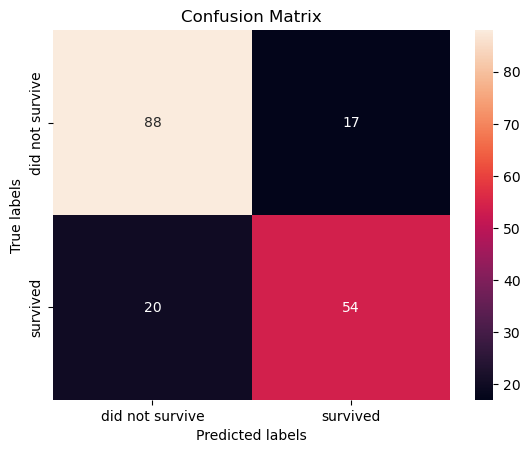

In [103]:
#za confusion matrix sam provjerila je li gore array i je u oba
def plot_confusion_matrix(Y_val, yhatval):
    
    cm = confusion_matrix(Y_val, yhatval)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax);
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['did not survive', 'survived'])
    ax.yaxis.set_ticklabels(['did not survive', 'survived'])

plot_confusion_matrix(Y_val, yhatval)   
#y_val was made on 0,2*titanictrain (20%*891 na traintestsplit uzela)so it was 179 units
#it is a sum of 88+17+20+54

In [104]:
#od 74 prezivjela, predvidjeli smo 54 prezivjela, a 20 smo rekli da nece prezivit a jesu, znaci tocnost 54/74
#od 105 umrlih, za 88 smo rekli da nece prezivit i nisu, a za 17 smo rekli da ce prezivit a nisu, tocnost 88/105
#neka sredina tocnosti izmedju te dvije od 0,83 i 0,77 je 0,80 tocnost
#confusion matrix mi iz rezultata y kolone jedinice cita kao true a nule kao false tj 01 gore i 01 udesno


In [105]:
#another way for confusion matrix

from sklearn import metrics
metrics.confusion_matrix(Y_val, yhatval)

from sklearn import metrics

#create confusion matrix
c_matrix = metrics.confusion_matrix(Y_val, yhatval)

#print confusion matrix
print(c_matrix)

[[88 17]
 [20 54]]


In [106]:
#my_array = np.array([[11,22,33],[44,55,66]])
#df = pd.DataFrame(my_array, columns = ['Column_A','Column_B','Column_C'])
#print(df)
#primjer: iz array u pandas



yhatsubmission = pd.DataFrame(yhatsubmission, columns = ['Yhatsubmission'])

print(yhatsubmission)
print(type(yhatsubmission))


     Yhatsubmission
0                 0
1                 1
2                 0
3                 0
4                 1
..              ...
413               0
414               1
415               0
416               0
417               0

[418 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>


In [107]:
#yhatsubmission_top = yhatsubmission.head()
#yhatsubmission_top
for col in yhatsubmission.columns:
    print(col)
    #ime kolone za svaki slucaj

Yhatsubmission


In [108]:
#submission = pd.read_csv('gender_submission.csv')
#ovo je tablica za predaju, isti brojevi putnika kao i u test dijelu excela

In [110]:
#submission= submission.drop(['Survived'],axis=1)
#print(submission)
#on 901 we see that in original submission table person didnt survive and down in new version with predicted values
#on 901 we predicted 901 to survive

In [111]:
extracted_col = yhatsubmission['Yhatsubmission']
 
display(extracted_col)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Yhatsubmission, Length: 418, dtype: int64

In [112]:
submission.insert(1, 'Yhatsubmission', extracted_col)
 
display(submission)

,PassengerId,Yhatsubmission
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [113]:
#Feature importance shuffle

In [114]:
#my_array = np.array(X_val)

In [115]:
X_val.head()
#pandas dataframe

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
709,3,1,0.346569,1,1,0.029758,6,1
439,2,1,0.384267,0,0,0.020495,3,3
840,3,1,0.246042,0,0,0.015469,2,3
720,2,0,0.070118,0,1,0.064412,2,3
39,3,0,0.170646,1,0,0.021942,3,1


In [116]:
print(type(X_val))
#Y_val je array(pandas core series provjerila je array)

<class 'pandas.core.frame.DataFrame'>


In [117]:
print(type(Y_val))

<class 'pandas.core.series.Series'>


In [118]:

#submission.to_csv('TitanicpredajafeatKate2023.csv')

In [119]:
#***first column permutation
X_val1 = X_val.copy()
#panda for permutation

In [120]:
X_val1.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
709,3,1,0.346569,1,1,0.029758,6,1
439,2,1,0.384267,0,0,0.020495,3,3
840,3,1,0.246042,0,0,0.015469,2,3
720,2,0,0.070118,0,1,0.064412,2,3
39,3,0,0.170646,1,0,0.021942,3,1


In [121]:
X_val1['Pclass'] = np.random.permutation(X_val1['Pclass'])

In [122]:
X_val1.head()
#i see permutation in the first column

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
709,3,1,0.346569,1,1,0.029758,6,1
439,3,1,0.384267,0,0,0.020495,3,3
840,1,1,0.246042,0,0,0.015469,2,3
720,1,0,0.070118,0,1,0.064412,2,3
39,3,0,0.170646,1,0,0.021942,3,1


In [123]:
X_val1.to_numpy()

array([[3.        , 1.        , 0.34656949, ..., 0.02975782, 6.        ,
        1.        ],
       [3.        , 1.        , 0.3842674 , ..., 0.02049464, 3.        ,
        3.        ],
       [1.        , 1.        , 0.24604172, ..., 0.01546857, 2.        ,
        3.        ],
       ...,
       [2.        , 0.        , 0.4722292 , ..., 0.06126432, 0.        ,
        3.        ],
       [1.        , 0.        , 0.2083438 , ..., 0.02049464, 4.        ,
        3.        ],
       [1.        , 0.        , 0.04498618, ..., 0.03259623, 6.        ,
        3.        ]])

In [126]:
yX_val1 = logreg_cv.predict(X_val1)

In [127]:
a1 = accuracy_score(Y_val, yX_val1)

In [128]:
#importancePclass= accuracy score X_Val-accuracy score X_val1
importancePclass = 0.7932960893854749-a1
print (importancePclass)

0.016759776536312887


In [129]:
#***second column permutation
X_val2 = X_val.copy()
X_val2.head()
#panda for permutation
X_val2['Sex'] = np.random.permutation(X_val2['Sex'])
X_val2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
709,3,1,0.346569,1,1,0.029758,6,1
439,2,0,0.384267,0,0,0.020495,3,3
840,3,1,0.246042,0,0,0.015469,2,3
720,2,1,0.070118,0,1,0.064412,2,3
39,3,1,0.170646,1,0,0.021942,3,1


In [130]:
X_val2.to_numpy()

array([[3.        , 1.        , 0.34656949, ..., 0.02975782, 6.        ,
        1.        ],
       [2.        , 0.        , 0.3842674 , ..., 0.02049464, 3.        ,
        3.        ],
       [3.        , 1.        , 0.24604172, ..., 0.01546857, 2.        ,
        3.        ],
       ...,
       [3.        , 0.        , 0.4722292 , ..., 0.06126432, 0.        ,
        3.        ],
       [2.        , 0.        , 0.2083438 , ..., 0.02049464, 4.        ,
        3.        ],
       [3.        , 1.        , 0.04498618, ..., 0.03259623, 6.        ,
        3.        ]])

In [132]:
yX_val2 = logreg_cv.predict(X_val2)

In [133]:
a2 = accuracy_score(Y_val, yX_val2)

In [134]:
#importancePclass= accuracy score X_Val-accuracy score X_val2
importanceSex = 0.7932960893854749-a2
print (importanceSex)

0.17877094972067042


In [135]:
#***third column permutation
X_val3 = X_val.copy()
X_val3.head()
#panda for permutation
X_val3['Age'] = np.random.permutation(X_val3['Age'])
X_val3.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
709,3,1,0.346569,1,1,0.029758,6,1
439,2,1,0.195778,0,0,0.020495,3,3
840,3,1,0.132948,0,0,0.015469,2,3
720,2,0,0.434531,0,1,0.064412,2,3
39,3,0,0.220910,1,0,0.021942,3,1


In [136]:
X_val3.to_numpy()

array([[3.        , 1.        , 0.34656949, ..., 0.02975782, 6.        ,
        1.        ],
       [2.        , 1.        , 0.19577783, ..., 0.02049464, 3.        ,
        3.        ],
       [3.        , 1.        , 0.13294798, ..., 0.01546857, 2.        ,
        3.        ],
       ...,
       [3.        , 0.        , 0.6481528 , ..., 0.06126432, 0.        ,
        3.        ],
       [2.        , 0.        , 0.34656949, ..., 0.02049464, 4.        ,
        3.        ],
       [3.        , 0.        , 0.24604172, ..., 0.03259623, 6.        ,
        3.        ]])

In [138]:
yX_val3 = logreg_cv.predict(X_val3)

In [139]:
a3 = accuracy_score(Y_val, yX_val3)

In [140]:
#importancePclass= accuracy score X_Val-accuracy score X_val3
importanceAge = 0.7932960893854749-a3
print (importanceAge)

0.033519553072625774


In [141]:
#***fourth column permutation
X_val4 = X_val.copy()
X_val4.head()
#panda for permutation
X_val4['SibSp'] = np.random.permutation(X_val4['SibSp'])
X_val4.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
709,3,1,0.346569,0,1,0.029758,6,1
439,2,1,0.384267,0,0,0.020495,3,3
840,3,1,0.246042,0,0,0.015469,2,3
720,2,0,0.070118,0,1,0.064412,2,3
39,3,0,0.170646,1,0,0.021942,3,1


In [142]:
X_val4.to_numpy()

array([[3.        , 1.        , 0.34656949, ..., 0.02975782, 6.        ,
        1.        ],
       [2.        , 1.        , 0.3842674 , ..., 0.02049464, 3.        ,
        3.        ],
       [3.        , 1.        , 0.24604172, ..., 0.01546857, 2.        ,
        3.        ],
       ...,
       [3.        , 0.        , 0.4722292 , ..., 0.06126432, 0.        ,
        3.        ],
       [2.        , 0.        , 0.2083438 , ..., 0.02049464, 4.        ,
        3.        ],
       [3.        , 0.        , 0.04498618, ..., 0.03259623, 6.        ,
        3.        ]])

In [144]:
yX_val4 = logreg_cv.predict(X_val4)

In [145]:
a4 = accuracy_score(Y_val, yX_val4)

In [146]:
#importancePclass= accuracy score X_Val-accuracy score X_val4
importanceSibSp = 0.7932960893854749-a4
print (importanceSibSp)

-0.011173184357541888


In [147]:
#***fifth column permutation
X_val5 = X_val.copy()
X_val5.head()
#panda for permutation
X_val5['Parch'] = np.random.permutation(X_val5['Parch'])
X_val5.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
709,3,1,0.346569,1,5,0.029758,6,1
439,2,1,0.384267,0,2,0.020495,3,3
840,3,1,0.246042,0,0,0.015469,2,3
720,2,0,0.070118,0,0,0.064412,2,3
39,3,0,0.170646,1,0,0.021942,3,1


In [148]:
X_val5.to_numpy()

array([[3.        , 1.        , 0.34656949, ..., 0.02975782, 6.        ,
        1.        ],
       [2.        , 1.        , 0.3842674 , ..., 0.02049464, 3.        ,
        3.        ],
       [3.        , 1.        , 0.24604172, ..., 0.01546857, 2.        ,
        3.        ],
       ...,
       [3.        , 0.        , 0.4722292 , ..., 0.06126432, 0.        ,
        3.        ],
       [2.        , 0.        , 0.2083438 , ..., 0.02049464, 4.        ,
        3.        ],
       [3.        , 0.        , 0.04498618, ..., 0.03259623, 6.        ,
        3.        ]])

In [150]:
yX_val5 = logreg_cv.predict(X_val5)

In [151]:
a5 = accuracy_score(Y_val, yX_val5)

In [152]:
#importancePclass= accuracy score X_Val-accuracy score X_val5
importanceParch = 0.7932960893854749-a5
print (importanceParch)

-0.005586592178770888


In [153]:
#***sixth column permutation
X_val6 = X_val.copy()
X_val6.head()
#panda for permutation
X_val6['Fare'] = np.random.permutation(X_val6['Fare'])
X_val6.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
709,3,1,0.346569,1,1,0.014102,6,1
439,2,1,0.384267,0,0,0.432884,3,3
840,3,1,0.246042,0,0,0.061045,2,3
720,2,0,0.070118,0,1,0.014631,2,3
39,3,0,0.170646,1,0,0.038061,3,1


In [154]:
X_val6.to_numpy()

array([[3.        , 1.        , 0.34656949, ..., 0.01410226, 6.        ,
        1.        ],
       [2.        , 1.        , 0.3842674 , ..., 0.43288417, 3.        ,
        3.        ],
       [3.        , 1.        , 0.24604172, ..., 0.06104473, 2.        ,
        3.        ],
       ...,
       [3.        , 0.        , 0.4722292 , ..., 0.01512699, 0.        ,
        3.        ],
       [2.        , 0.        , 0.2083438 , ..., 0.48312843, 4.        ,
        3.        ],
       [3.        , 0.        , 0.04498618, ..., 0.1111184 , 6.        ,
        3.        ]])

In [156]:
yX_val6 = logreg_cv.predict(X_val6)

In [157]:
a6 = accuracy_score(Y_val, yX_val6)

In [158]:
#importancePclass= accuracy score X_Val-accuracy score X_val6
importanceFare = 0.7932960893854749-a6
print (importanceFare)

0.0


In [159]:
#***seventh column permutation
X_val7 = X_val.copy()
X_val7.head()
#panda for permutation
X_val7['Cabin'] = np.random.permutation(X_val7['Cabin'])
X_val7.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
709,3,1,0.346569,1,1,0.029758,1,1
439,2,1,0.384267,0,0,0.020495,0,3
840,3,1,0.246042,0,0,0.015469,4,3
720,2,0,0.070118,0,1,0.064412,1,3
39,3,0,0.170646,1,0,0.021942,1,1


In [160]:
X_val7.to_numpy()

array([[3.        , 1.        , 0.34656949, ..., 0.02975782, 1.        ,
        1.        ],
       [2.        , 1.        , 0.3842674 , ..., 0.02049464, 0.        ,
        3.        ],
       [3.        , 1.        , 0.24604172, ..., 0.01546857, 4.        ,
        3.        ],
       ...,
       [3.        , 0.        , 0.4722292 , ..., 0.06126432, 2.        ,
        3.        ],
       [2.        , 0.        , 0.2083438 , ..., 0.02049464, 3.        ,
        3.        ],
       [3.        , 0.        , 0.04498618, ..., 0.03259623, 1.        ,
        3.        ]])

In [163]:
yX_val7 = logreg_cv.predict(X_val7)

In [164]:
a7 = accuracy_score(Y_val, yX_val7)

In [165]:
#importancePclass= accuracy score X_Val-accuracy score X_val7
importanceCabin = 0.7932960893854749-a7
print (importanceCabin)

-0.005586592178770888


In [166]:
#***eighth column permutation
X_val8 = X_val.copy()
X_val8.head()
#panda for permutation
X_val8['Embarked'] = np.random.permutation(X_val8['Embarked'])
X_val8.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
709,3,1,0.346569,1,1,0.029758,6,3
439,2,1,0.384267,0,0,0.020495,3,3
840,3,1,0.246042,0,0,0.015469,2,3
720,2,0,0.070118,0,1,0.064412,2,1
39,3,0,0.170646,1,0,0.021942,3,3


In [167]:
X_val8.to_numpy()

array([[3.        , 1.        , 0.34656949, ..., 0.02975782, 6.        ,
        3.        ],
       [2.        , 1.        , 0.3842674 , ..., 0.02049464, 3.        ,
        3.        ],
       [3.        , 1.        , 0.24604172, ..., 0.01546857, 2.        ,
        3.        ],
       ...,
       [3.        , 0.        , 0.4722292 , ..., 0.06126432, 0.        ,
        3.        ],
       [2.        , 0.        , 0.2083438 , ..., 0.02049464, 4.        ,
        1.        ],
       [3.        , 0.        , 0.04498618, ..., 0.03259623, 6.        ,
        3.        ]])

In [170]:
yX_val8 = logreg_cv.predict(X_val8)

In [171]:
a8 = accuracy_score(Y_val, yX_val8)

In [172]:
#importancePclass= accuracy score X_Val-accuracy score X_val8
importanceEmbarked = 0.7932960893854749-a8
print (importanceEmbarked)

-0.011173184357541888


In [173]:
dictionary_feature_importance = {'Pclass': [importancePclass], 'Sex':[importanceSex], 'Age': [importanceAge], 'SibSp':[importanceSibSp], 'Parch':[importanceParch], 'Fare':[importanceFare], 'Cabin': [importanceCabin], 'Embarked':[importanceEmbarked]}

In [174]:
feature_importance = pd.DataFrame(dictionary_feature_importance)
feature_importance.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0.01676,0.178771,0.03352,-0.011173,-0.005587,0.0,-0.005587,-0.011173


In [175]:
#We can see that the strongest impact has variable Sex
#spremala sam varijable accuracy u posebne jer iz svakog novog refresha mala razlika u accuracy pa da ne bude razlika 
#u prenesenom oduzimanju niže

In [292]:

#submission.to_csv('TitanicGRIDSEARCHKate2023.csv')